#**Importing Libraries**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
import seaborn as sns

#**Load Dataset**

In [7]:
df = pd.read_csv('german_credit_data.csv')

The selected attributes are:

Age (numeric)
Sex (text: male, female)
Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
Housing (text: own, rent, or free)
Saving accounts (text - little, moderate, quite rich, rich)
Checking account (numeric, in DM - Deutsch Mark)
Credit amount (numeric, in DM)
Duration (numeric, in month)
Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)






#**Data Preparation**

In [8]:
df.head(10)

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car
5,5,35,male,1,free,NaN,NaN,9055,36,education
6,6,53,male,2,own,quite rich,NaN,2835,24,furniture/equipment
7,7,35,male,3,rent,little,moderate,6948,36,car
8,8,61,male,1,own,rich,NaN,3059,12,radio/TV
9,9,28,male,3,own,little,moderate,5234,30,car


In [9]:
df.shape

(1000, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.2+ KB


In [11]:
df.describe(include='all')

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
count,1000.000000,1000.000000,1000,1000.000000,1000,817,606,1000.000000,1000.000000,1000
unique,NaN,NaN,2,NaN,3,4,3,NaN,NaN,8
top,NaN,NaN,male,NaN,own,little,little,NaN,NaN,car
freq,NaN,NaN,690,NaN,713,603,274,NaN,NaN,337
mean,499.500000,35.546000,NaN,1.904000,NaN,NaN,NaN,3271.258000,20.903000,NaN
std,288.819436,11.375469,NaN,0.653614,NaN,NaN,NaN,2822.736876,12.058814,NaN
min,0.000000,19.000000,NaN,0.000000,NaN,NaN,NaN,250.000000,4.000000,NaN
25%,249.750000,27.000000,NaN,2.000000,NaN,NaN,NaN,1365.500000,12.000000,NaN
50%,499.500000,33.000000,NaN,2.000000,NaN,NaN,NaN,2319.500000,18.000000,NaN
75%,749.250000,42.000000,NaN,2.000000,NaN,NaN,NaN,3972.250000,24.000000,NaN


#**EDA**

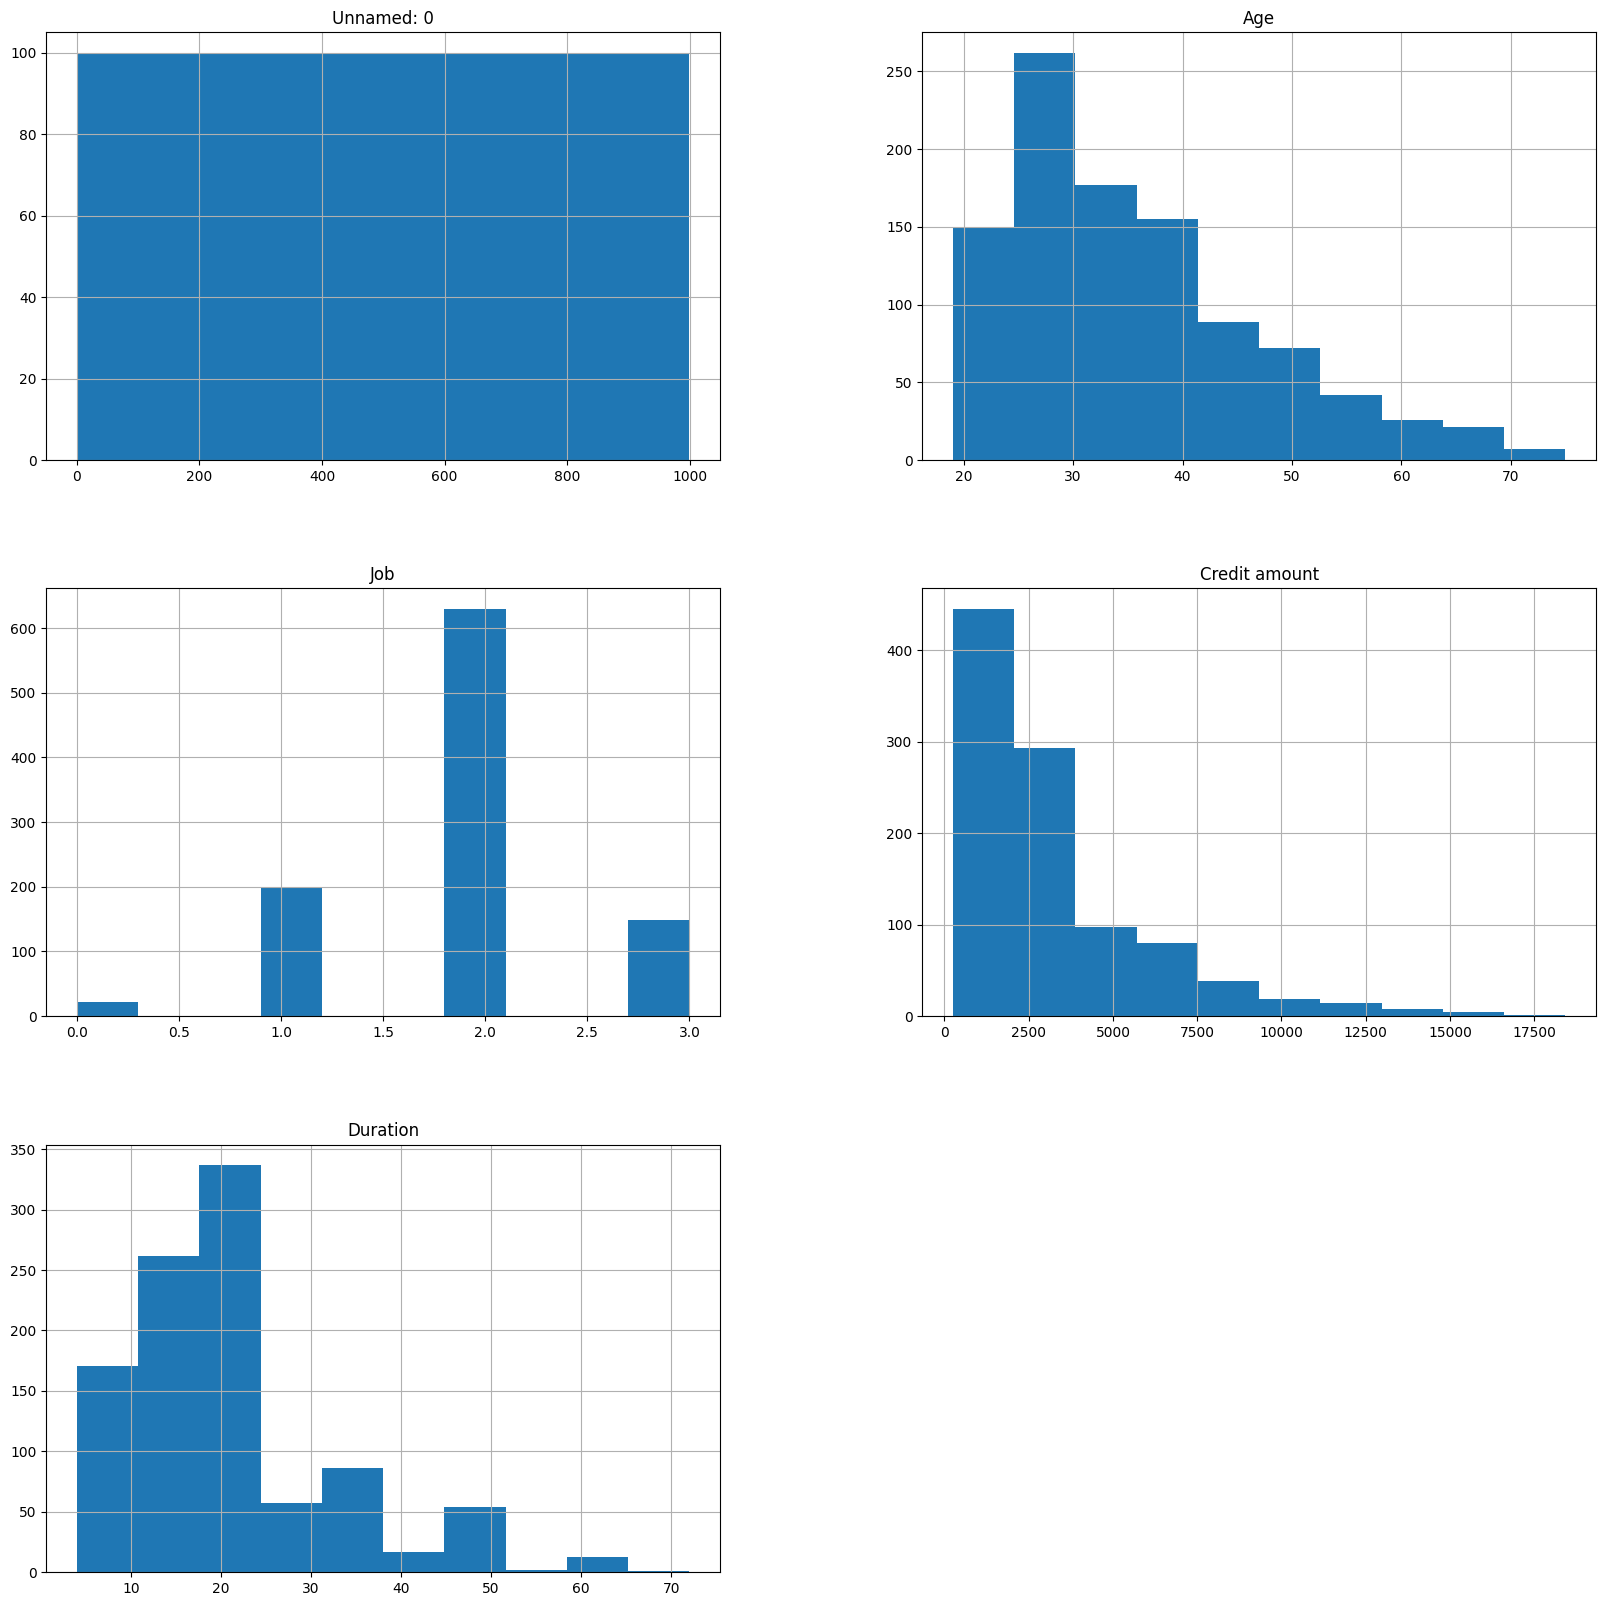

In [12]:
df.hist(figsize=(20, 20))
plt.show()

In [13]:
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]

In [14]:
df.to_csv('german_credit_data.csv')


In [15]:
w=df['Credit amount'].max()
print(w)

18424


In [16]:
def determine_creditability(row):
    # Example criteria (adjust these based on your requirements)
    if row['Credit amount'] < 5000:  # Replace with your threshold
        return 1  # Creditworthy
    else:
        return 0  # Not creditworthy

# Apply the function to each row
df['Creditability'] = df.apply(determine_creditability, axis=1)

# Save the updated DataFrame
df.to_csv('updated_file.csv', index=False)

In [17]:
df1=pd.read_csv('updated_file.csv')
df.head(2)

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Creditability
0,67,male,2,own,NaN,little,1169,6,radio/TV,1
1,22,female,2,own,little,moderate,5951,48,radio/TV,0


Here 1-credit worthy
     2-not credit worthy

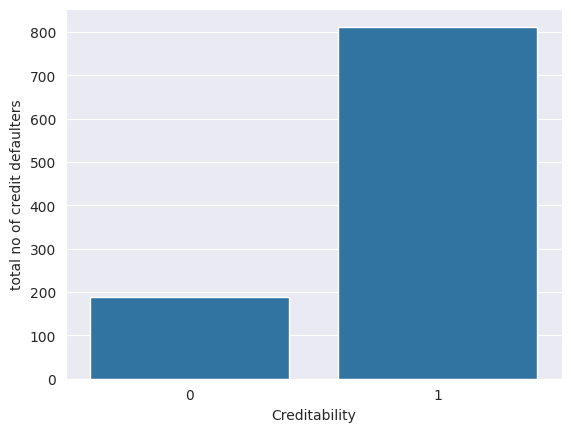

In [18]:
sns.set_style('darkgrid')
plt.ylabel("total no of credit defaulters")
dx=sns.countplot(x='Creditability', data=df1)
plt.show()

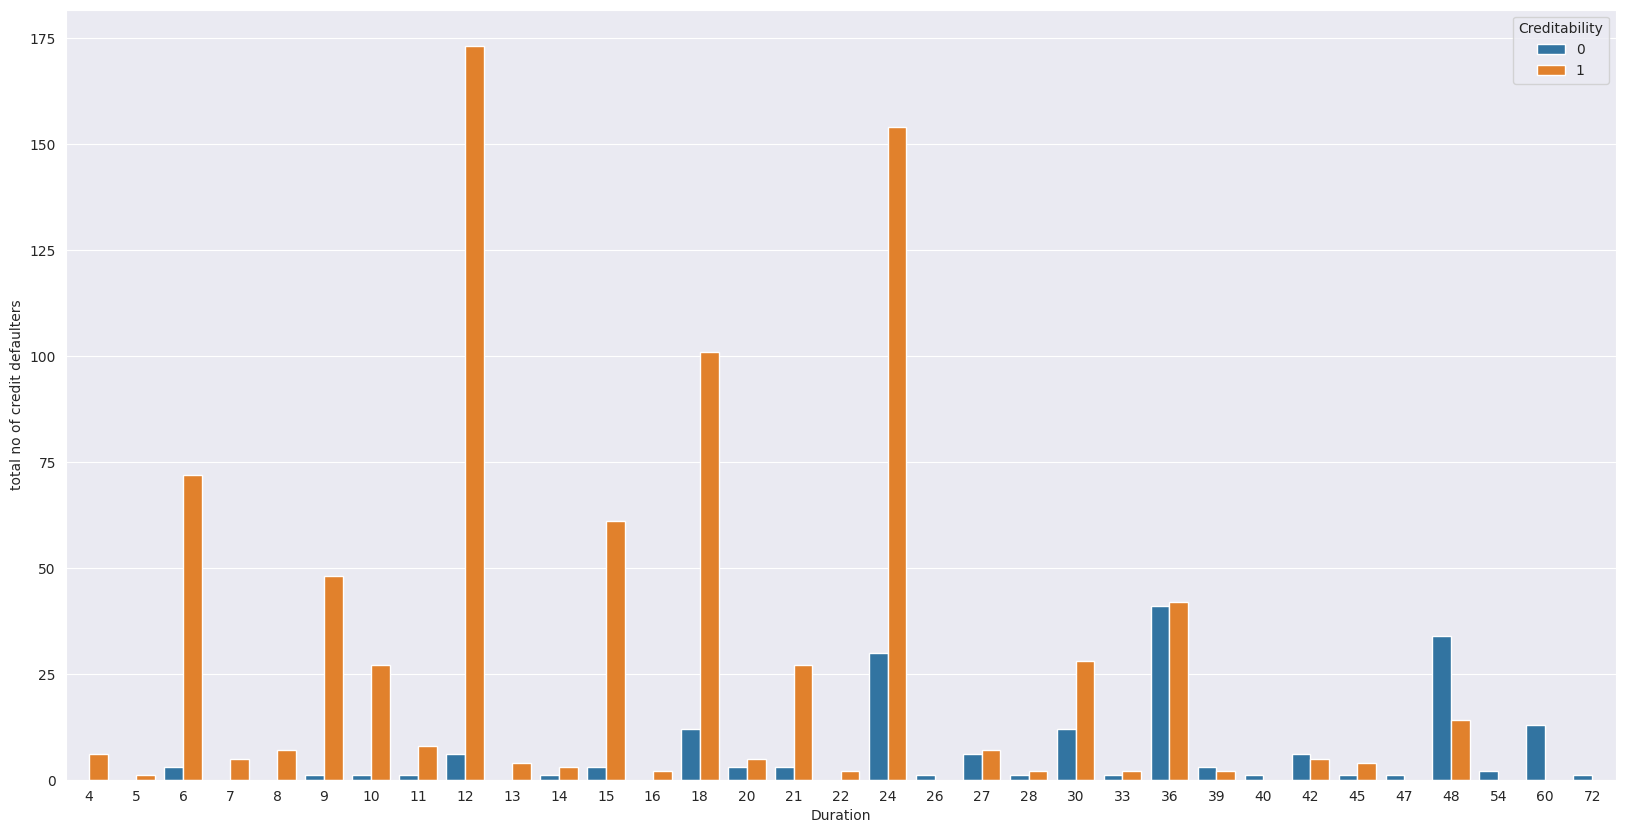

In [19]:
plt.figure(figsize=(20,10))
sns.countplot(x='Duration', hue='Creditability', data=df1)
plt.xlabel('Duration')
plt.ylabel('total no of credit defaulters')
plt.show()

In [20]:
gender_df=df1.groupby(["Sex", "Creditability"])["Purpose"].value_counts()
gender_df

Sex     Creditability  Purpose            
female  0              car                     21
                       radio/TV                 8
                       furniture/equipment      7
                       business                 4
                       education                3
                       vacation/others          2
        1              radio/TV                77
                       car                     73
                       furniture/equipment     67
                       education               21
                       business                15
                       domestic appliances      6
                       repairs                  5
                       vacation/others          1
male    0              car                     68
                       business                22
                       radio/TV                19
                       furniture/equipment     15
                       education                9
                       vacation/others          6
                       repairs                  4
        1              radio/TV               176
                       car                    175
                       furniture/equipment     92
                       business                56
                       education               26
                       repairs                 13
                       domestic appliances      6
                       vacation/others          3
Name: count, dtype: int64

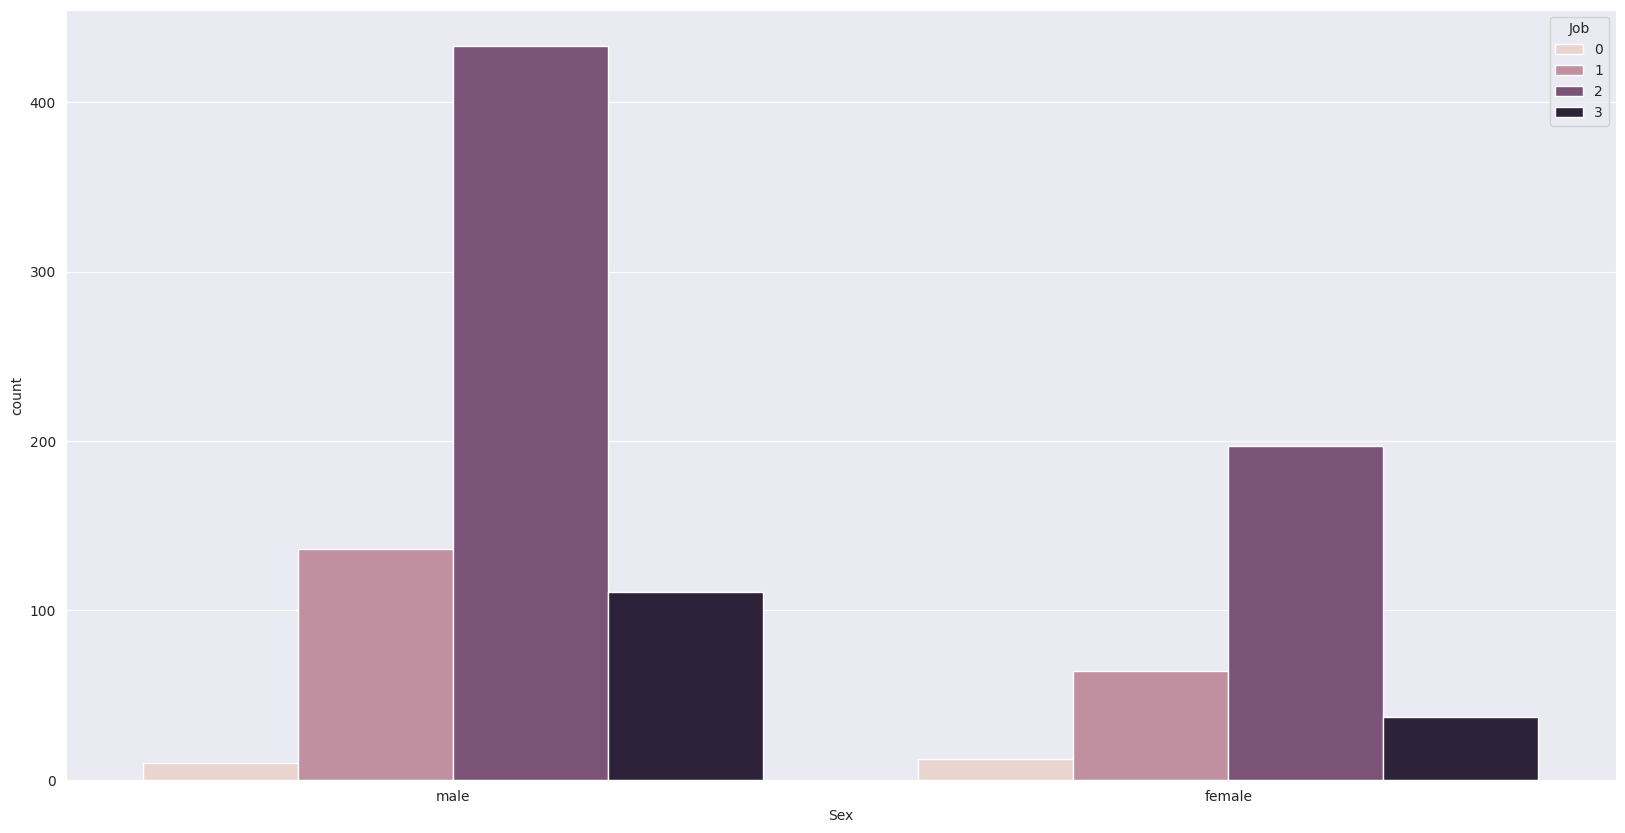

In [21]:
plt.figure(figsize=(20,10))
ax=sns.countplot(x='Sex', hue='Job', data=df1)
plt.legend(title='Job',loc='upper right')
plt.show()

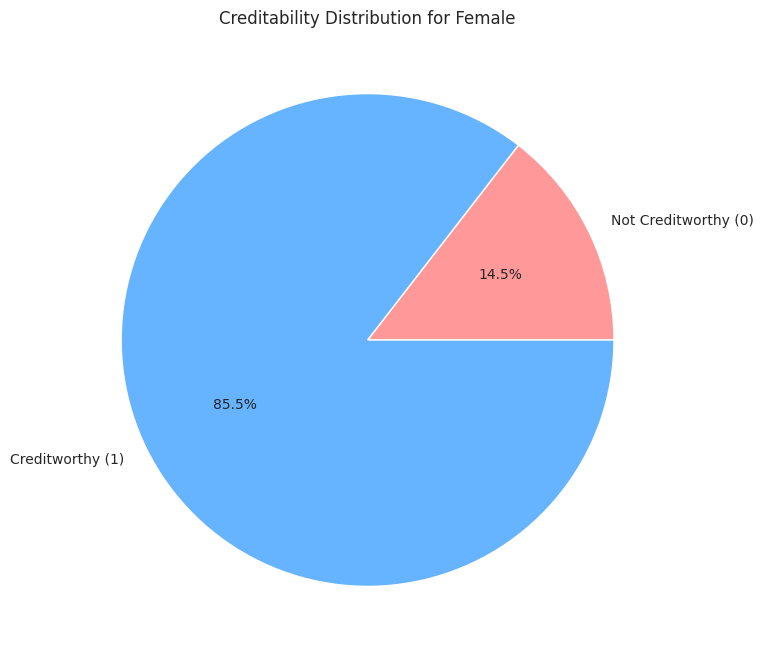

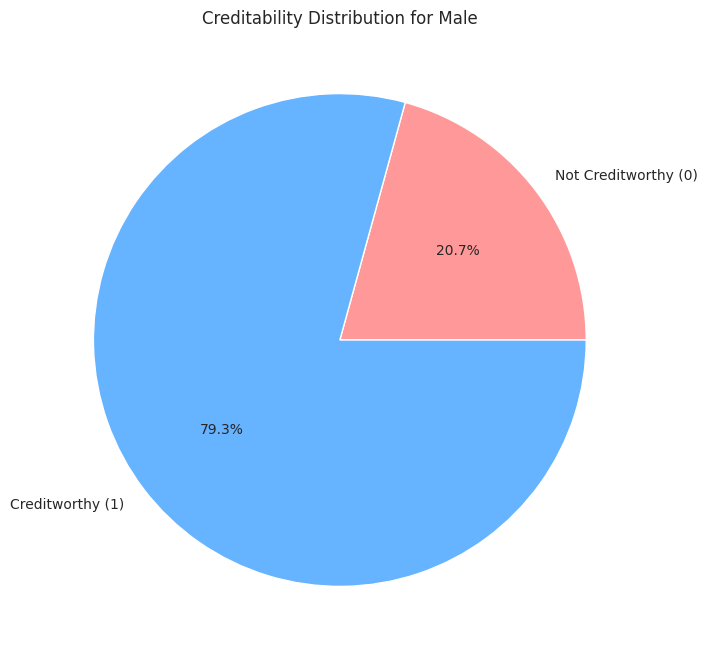

In [22]:
creditability_counts = df1.groupby(['Sex', 'Creditability']).size().unstack(fill_value=0)
colors = ['#FF9999', '#66B3FF']
# Plot pie charts for each gender
for gender in creditability_counts.index:
    plt.figure(figsize=(8, 8))
    plt.pie(creditability_counts.loc[gender], labels=['Not Creditworthy (0)', 'Creditworthy (1)'], autopct='%1.1f%%', colors=colors)
    plt.title(f'Creditability Distribution for {gender.capitalize()}')
    plt.show()

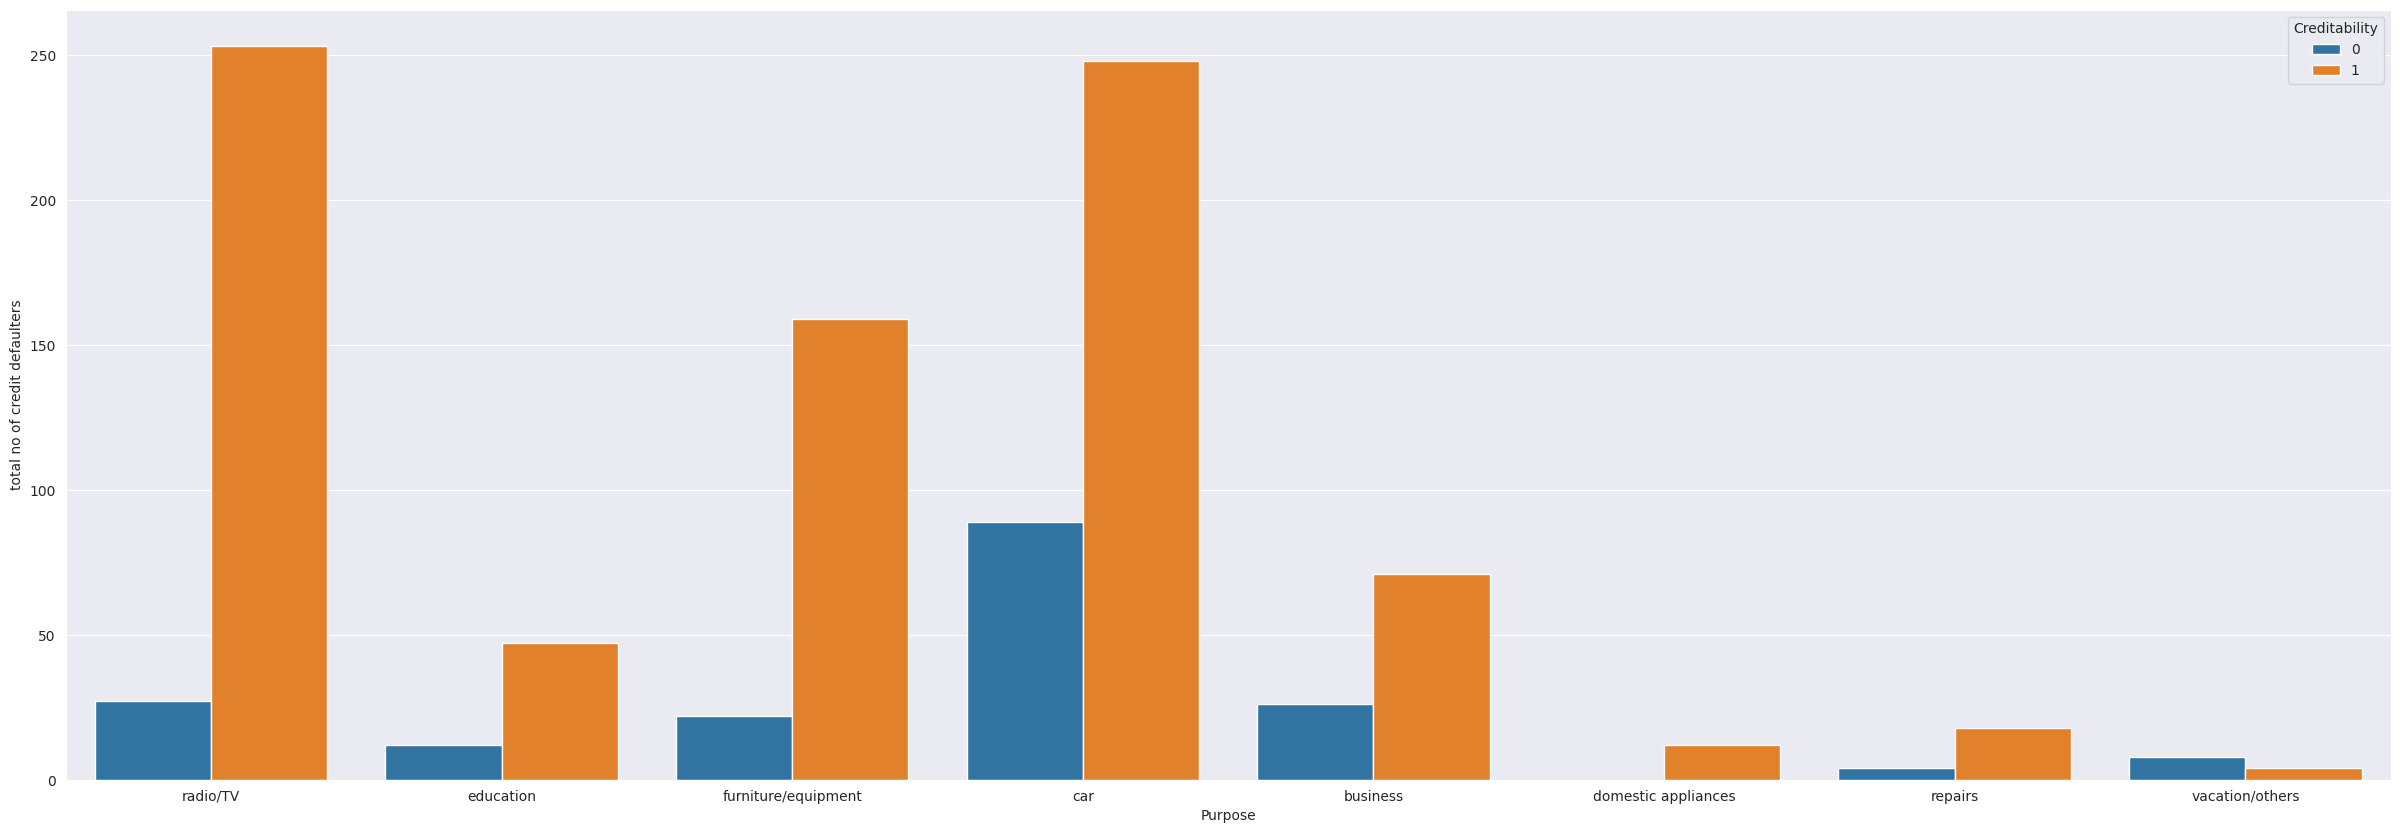

In [23]:
plt.figure(figsize=(30,10))
plt.ylabel("total no of credit defaulters")
dx=sns.countplot(x='Purpose', hue='Creditability', data=df1)
plt.show()

**1: Good customers
  2: Bad customers**

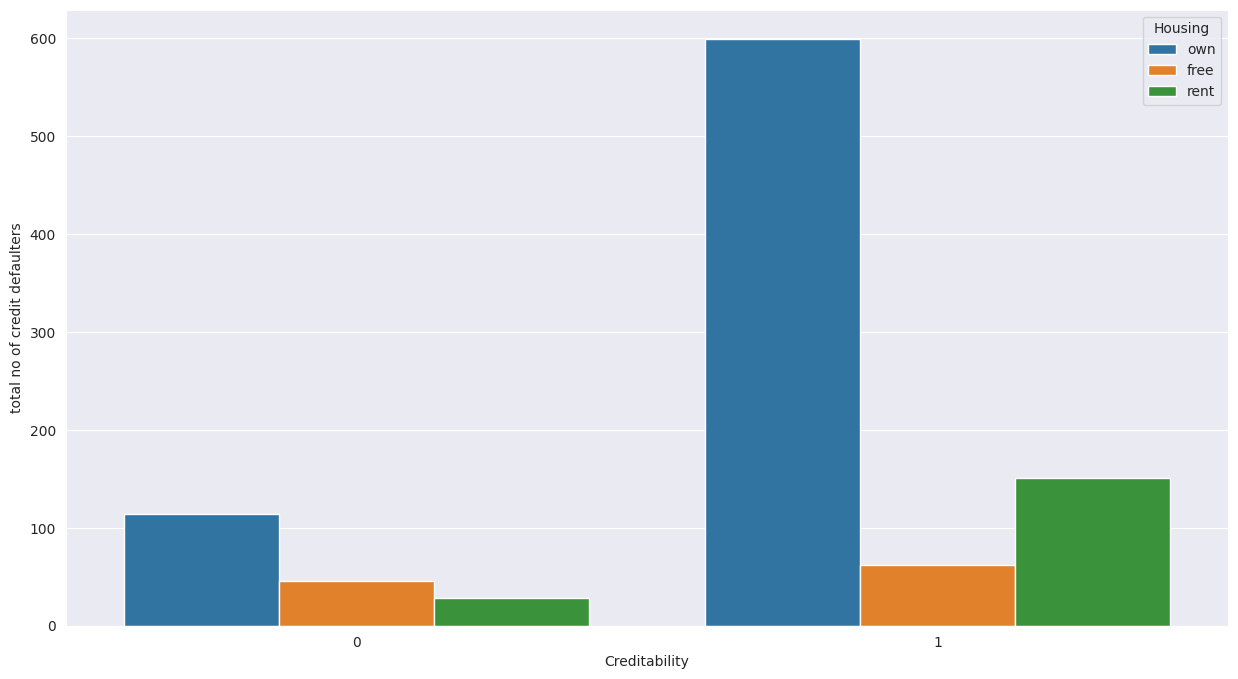

In [24]:
plt.figure(figsize=(15,8))
plt.ylabel("total no of credit defaulters")
dx=sns.countplot(x='Creditability', hue='Housing', data=df1)
plt.show()

**Correlation**

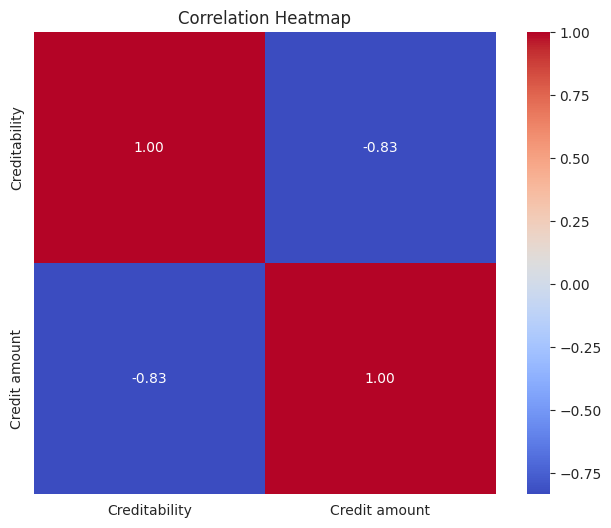

In [25]:
corr = df1[['Creditability', 'Credit amount']].corr()

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap')
plt.show()

**converting categorical value into numerical  values**

In [26]:
df1['Sex'] = df1['Sex'].replace({'male': 1, 'female': 0})

In [27]:
df1['Housing'] = df1['Housing'].replace({'own': 0, 'free': 1, 'rent': 2})

In [28]:
options=['little' 'moderate', 'rich', 'quite rich']
nan_mask = df1['Saving accounts'].isna()
df1.loc[nan_mask, 'Saving accounts'] = np.random.choice(options, size=nan_mask.sum())

In [29]:
nan_mask = df1['Checking account'].isna()
df1.loc[nan_mask, 'Checking account'] = np.random.choice(options, size=nan_mask.sum())

In [30]:
df1['Saving accounts'] = df1['Saving accounts'].replace({'little': 0, 'moderate': 1, 'rich': 2, 'quite rich': 3})
df1['Checking account'] = df1['Checking account'].replace({'little': 0, 'moderate': 1, 'rich': 2, 'quite rich': 3})

In [31]:
df1['Saving accounts']=df1['Saving accounts'].replace({'littlemoderate':4})
df1['Checking account']=df1['Checking account'].replace({'littlemoderate':4})

In [32]:
df1.drop(['Purpose'],axis=1,inplace=True)

#**preparation of datasets**

In [33]:
Predictor = df1[df1.columns[df1.columns != 'Creditability']]  # All columns except 'Creditability'
Target = df1['Creditability']

**Splitting data for training and testing**

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Predictor, Target, test_size = 0.3, random_state = 1)


In [35]:
print("X train",X_train.shape)
print("Y train",y_train.shape)
print("X test",X_test.shape)
print("y test",y_test.shape)

X train (700, 8)
Y train (700,)
X test (300, 8)
y test (300,)


#**Model Training**

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [37]:
logr=LogisticRegression()
logr.fit(X_train,y_train)
y_Pred=logr.predict(X_test)

In [38]:
y_Pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1])

In [39]:
conf_matrix=confusion_matrix(y_test,y_Pred)
conf_matrix

array([[ 56,   6],
       [  8, 230]])

**Confusion matrix structure

In [40]:
#([[True positive(TP), False Negative(FN)],
# [False Positive(FP), True Negavtive(TN)]

#True Positives (TP): This value should be high. It indicates the number of actual positives that were correctly identified by the model.

#True Negatives (TN): This value should also be high. It indicates the number of actual negatives that were correctly identified.

#False Positives (FP): This value should be low. It indicates the number of actual negatives that were incorrectly classified as positives.

#False Negatives (FN): This value should be low. It indicates the number of actual positives that were incorrectly classified as negatives.

Text(0.5, 23.52222222222222, 'Predicted label')

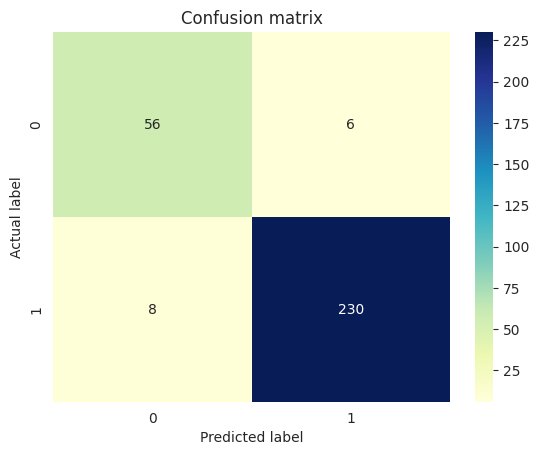

In [41]:
sns.heatmap(pd.DataFrame(conf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

**Accuracy = (TP+TN)/(TP+TN+FP+FN)**

---


  **Precision = (TP)/(TP+FP)**

---


  **Recall = (TP)/(TP+FN)**

---


  **F1 score = 2 x (Precision x Recall)/(Precision + Recall)**

In [42]:
print('Accuracy',accuracy_score(y_test,y_Pred))
print('Precision',logr.score(X_test,y_test))
print('Recall',logr.score(X_test,y_test))
print('F1 score',logr.score(X_test,y_test))

Accuracy 0.9533333333333334
Precision 0.9533333333333334
Recall 0.9533333333333334
F1 score 0.9533333333333334


In [43]:
print(classification_report(y_test,y_Pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        62
           1       0.97      0.97      0.97       238

    accuracy                           0.95       300
   macro avg       0.92      0.93      0.93       300
weighted avg       0.95      0.95      0.95       300



In [46]:
from sklearn import metrics

In [48]:
y_pred_proba=logr.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

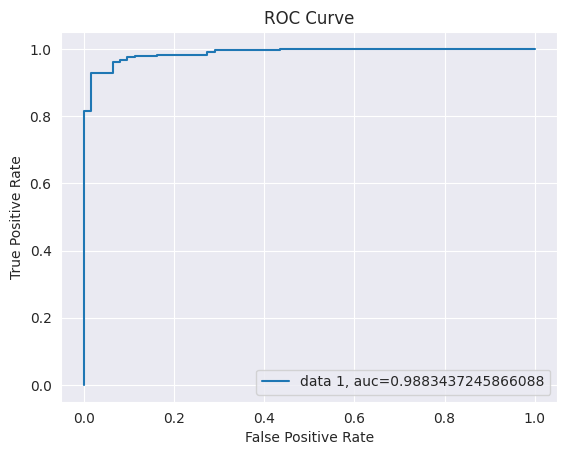

In [51]:
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.show()

In [53]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [55]:
kfold=KFold(n_splits=3, random_state=7, shuffle=True)
result = cross_val_score(logr, X_train, y_train, cv=kfold, scoring='accuracy')
print(result.mean())

0.9528447232309892


**The Model has accuracy rate of 95%**

In [58]:
df1.to_csv('preprocessed_data.csv', index=False)